In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import norm
import seaborn as sns

### 研讨题4

---
#### 观测模型：

$z_n{\sim}U[0,\frac{1}{\theta}];n=0,1,...,N-1;{\theta}>0$

针对该的观测模型，利用蒙特卡洛仿真讨论参数最大似然估计的性质，如偏差、方差、均方根误差、渐进特性等。可能的话，与MVUE的方差或CRLB进行对比。

---

均方误差：$mse(\widehat{\theta})=E\{[\widehat{\theta}-\theta]^2\}=Var(\widehat{\theta})$(估计方差)$+[E(\widehat{\theta})-\theta]^2$(偏差项)

---
* <font color='red'>设$\theta$=0.1</font>
* 蒙特卡洛仿真次数M＝1000
* 样本值长度从1e1到1e3，指数步进，100个样本集合

In [2]:
theta = 0.1

theta_mean = []
theta_var = []
theta_mse = []
theta_bias = []
N = np.logspace(1,3,num=100,dtype=int)
for i in N:
    ta = []
    for j in range(1000):
        Zn = uniform.rvs(loc=0,scale=1/theta,size=i)
        ta.append(1/np.max(Zn))
    theta_mean.append(np.mean(ta))
    theta_var.append(np.var(ta))
    theta_mse.append(np.mean(np.power(np.array(ta)-theta,2)))
    theta_bias.append(np.power(np.mean(ta)-theta,2))


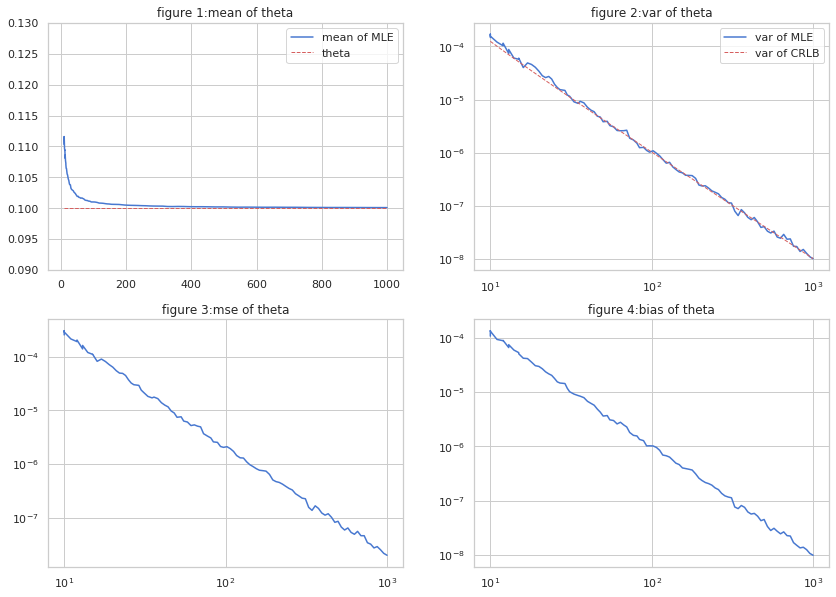

In [9]:


plt.figure(figsize=(14,10))

sns.set(style='whitegrid', palette="muted", color_codes=True)

plt.subplot('221')
plt.plot(N,theta_mean,label='mean of MLE')
plt.plot(N,0.1*np.ones(len(N)),'r--',linewidth=1,label='theta')
plt.title('figure 1:mean of theta')
plt.ylim(ymin=0.09,ymax=0.13)
# plt.xscale('log')
plt.legend()

plt.subplot('222')
plt.plot(N,theta_var,label='var of MLE')
plt.plot(N,theta**2/N/(N-2),'r--',linewidth=1,label='var of CRLB')
plt.title('figure 2:var of theta')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot('223')
plt.plot(N,theta_mse)
plt.title('figure 3:mse of theta')
plt.yscale('log')
plt.xscale('log')

plt.subplot('224')
plt.plot(N,theta_bias)
plt.title('figure 4:bias of theta')
plt.yscale('log')
plt.xscale('log')
plt.show()

#### 结果分析
---
* 图1为估计量均值的变化曲线，可以看出随着样本数的增加，渐进均值趋向真值
* 图2为估计量方差的变化曲线，可以看出随着样本数的增加，渐进方差趋向估计量的CRLB，$CRLB=\frac{{\theta}^2}{N(N-2)}$
* 图3、图4为估计量的均方误差与偏差，随着样本数的增加线性下降
* 除图1外，其它三图均采样对数坐标轴

#### 概率密度曲线

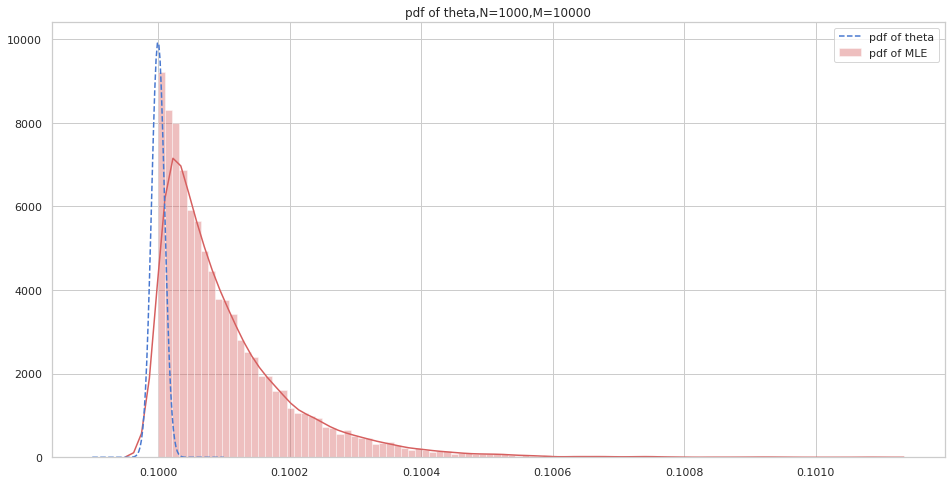

In [49]:
t = []
N = 1000

for j in range(10000):
    Zn = uniform.rvs(loc=0,scale=1/theta,size=N)
    t.append(1/np.max(Zn))

plt.figure(figsize=(16,8))

sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(t,color="r",bins=100,kde=True,label='pdf of MLE')
plt.plot(np.linspace(0.0999,0.1001,100),(2.5e-4)*norm.pdf(np.linspace(0.0999999,0.1000001,100),loc=0.1,scale=theta**2/N/(N-2)),'b--',label='pdf of theta')
plt.title('pdf of theta,N=1000,M=10000')
plt.legend()
plt.show()
